In [1]:
import numpy as np

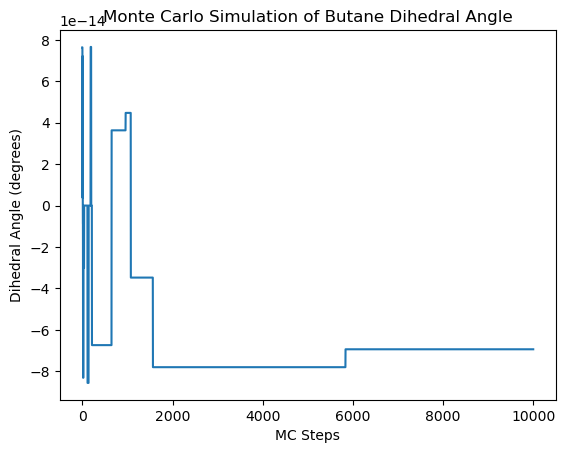

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 1.0  # Lennard-Jones parameter
sigma = 3.0    # Lennard-Jones parameter
temperature = 300.0  # in Kelvin

# Function to calculate Lennard-Jones potential energy
def lj_potential(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# Function to calculate total potential energy of the system
def total_energy(positions):
    n_atoms = len(positions) // 3
    energy = 0.0

    for i in range(n_atoms - 1):
        for j in range(i + 1, n_atoms):
            dx = positions[i] - positions[j]
            dy = positions[i + n_atoms] - positions[j + n_atoms]
            dz = positions[i + 2 * n_atoms] - positions[j + 2 * n_atoms]

            # Minimum image convention for periodic boundary conditions
            dx -= np.round(dx / box_size) * box_size
            dy -= np.round(dy / box_size) * box_size
            dz -= np.round(dz / box_size) * box_size

            r = np.sqrt(dx**2 + dy**2 + dz**2)
            energy += lj_potential(r)

    return energy

# Function to calculate dihedral angle
def dihedral_angle(positions):
    # Extract coordinates of the four consecutive carbon atoms
    C1 = positions[:3]
    C2 = positions[3:6]
    C3 = positions[6:9]
    C4 = positions[9:12]

    # Vectors between consecutive atoms
    b1 = C2 - C1
    b2 = C3 - C2
    b3 = C4 - C3

    # Cross products
    b2xb3 = np.cross(b2, b3)
    b1xb2 = np.cross(b1, b2)

    # Dihedral angle calculation
    dihedral_rad = np.arctan2(np.linalg.norm(b1xb2) * np.dot(b2, b2xb3), np.dot(b1xb2, b2xb3))
    dihedral_deg = np.degrees(dihedral_rad)

    return dihedral_deg

# Function to perform Metropolis Monte Carlo simulation
def metropolis_mc(positions, temperature, steps, box_size):
    energies = []
    dihedral_angles = []

    for _ in range(steps):
        # Randomly select an atom
        atom_index = np.random.randint(0, len(positions) // 3)

        # Save current position
        current_position = np.copy(positions)

        # Displace the selected atom randomly
        positions[atom_index] += np.random.uniform(-0.5, 0.5) * box_size
        positions[atom_index + len(positions) // 3] += np.random.uniform(-0.5, 0.5) * box_size
        positions[atom_index + 2 * len(positions) // 3] += np.random.uniform(-0.5, 0.5) * box_size

        # Calculate energy change
        delta_energy = total_energy(positions) - total_energy(current_position)

        # Metropolis acceptance criterion
        if delta_energy > 0 and np.random.rand() > np.exp(-delta_energy / (kb * temperature)):
            # Reject the move
            positions = np.copy(current_position)

        energies.append(total_energy(positions))
        dihedral_angles.append(dihedral_angle(positions))

    return positions, energies, dihedral_angles

# Simulation parameters
n_atoms = 4
box_size = 20.0
kb = 8.617333262145e-5  # Boltzmann constant in eV/K

# Initial positions
initial_positions = np.random.rand(3 * n_atoms) * box_size

# Perform Metropolis Monte Carlo simulation
steps = 10000
final_positions, energies, dihedral_angles = metropolis_mc(initial_positions, temperature, steps, box_size)

# Plotting the dihedral angle trajectory
plt.plot(dihedral_angles)
plt.xlabel('MC Steps')
plt.ylabel('Dihedral Angle (degrees)')
plt.title('Monte Carlo Simulation of Butane Dihedral Angle')
plt.savefig('mc_butane.jpg')